# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import pandas as pd
import numpy as np
import requests
import time
import pprint
from scipy.stats import linregress

# Import the OpenWeatherMap API key and output path
from api_keys import weather_api_key
# from api_keys import output_path

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
from api_keys import output_path

In [4]:
BASE_URL = 'https://api.openweathermap.org/data/2.5/weather?appid=' + weather_api_key + '&units=imperial'
NUM_POINTS = 1500

HTTP_STATUS_OK = 200
HTTP_STATUS_NOT_FOUND = 404

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the cities' names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=NUM_POINTS)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=NUM_POINTS)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


In [ ]:
# Make a single API call to see what the data returned looks like

sample_weather = 'https://api.openweathermap.org/data/2.5/weather?lat=31.84353411571213&lon=71.30318609462759&appid=' + weather_api_key

sample_weather_result = requests.get(sample_weather)
pprint.pp(sample_weather_result.json())


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = BASE_URL + '&q=' + city.replace(' ', '+')
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    city_response = requests.get(city_url)
    status_code = city_response.status_code
    
    # Run an API request for each of the cities
    if status_code == HTTP_STATUS_OK:
        # Parse the JSON and retrieve data
        city_weather = city_response.json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all'] # this is the percent coverage expressed as an integer
        city_wind_spd = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind_spd,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    elif status_code == HTTP_STATUS_NOT_FOUND:
        print(f"City {city} Not found. Skipping...")
    else:
        raise ValueError(f"Unknown status code {status_code} for city {city}")
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | zouerate
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | pemagatshel
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | newman
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | karratha
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | rubidoux
Processing Record 11 of Set 1 | taiohae
City taiohae Not found. Skipping...
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | nova sintra
Processing Record 14 of Set 1 | karasburg
Processing Record 15 of Set 1 | huocheng
City huocheng Not found. Skipping...
Processing Record 16 of Set 1 | kruisfontein
Processing Record 17 of Set 1 | gueltat zemmour
City gueltat zemmour Not found. Skipping...
Processing Record 18 of Set 1 | tazovsky
Processing Record 19 of Set 1 | dunedin
Processing Record 20 of

Processing Record 37 of Set 4 | mattoon
Processing Record 38 of Set 4 | felipe carrillo puerto
Processing Record 39 of Set 4 | muzayri'
City muzayri' Not found. Skipping...
Processing Record 40 of Set 4 | limon
Processing Record 41 of Set 4 | mount isa
Processing Record 42 of Set 4 | st. john's
Processing Record 43 of Set 4 | crestview
Processing Record 44 of Set 4 | tulun
Processing Record 45 of Set 4 | sungai penuh
Processing Record 46 of Set 4 | bangassou
Processing Record 47 of Set 4 | imbituba
Processing Record 48 of Set 4 | lebu
Processing Record 49 of Set 4 | priladozhskiy
Processing Record 0 of Set 5 | vila franca do campo
Processing Record 1 of Set 5 | mata-utu
Processing Record 2 of Set 5 | cidreira
Processing Record 3 of Set 5 | hobyo
Processing Record 4 of Set 5 | colonia
Processing Record 5 of Set 5 | fish town
Processing Record 6 of Set 5 | tofol
Processing Record 7 of Set 5 | papao
Processing Record 8 of Set 5 | weno
Processing Record 9 of Set 5 | palikir - national gove

Processing Record 27 of Set 8 | ghadamis
Processing Record 28 of Set 8 | nadi
Processing Record 29 of Set 8 | el porvenir
Processing Record 30 of Set 8 | rong kwang
Processing Record 31 of Set 8 | dul'durga
Processing Record 32 of Set 8 | peterhead
Processing Record 33 of Set 8 | mangrol
Processing Record 34 of Set 8 | roma
Processing Record 35 of Set 8 | santo antonio
Processing Record 36 of Set 8 | katsuura
Processing Record 37 of Set 8 | tucuma
Processing Record 38 of Set 8 | badiyah
Processing Record 39 of Set 8 | estevan
Processing Record 40 of Set 8 | malvan
Processing Record 41 of Set 8 | wailua homesteads
Processing Record 42 of Set 8 | mezhdurechensk
Processing Record 43 of Set 8 | mahina
Processing Record 44 of Set 8 | akureyri
Processing Record 45 of Set 8 | grand rapids
Processing Record 46 of Set 8 | borba
Processing Record 47 of Set 8 | sao bernardo do campo
Processing Record 48 of Set 8 | sananduva
Processing Record 49 of Set 8 | upanema
Processing Record 0 of Set 9 | ly

Processing Record 14 of Set 12 | midvagur
Processing Record 15 of Set 12 | chernogorsk
Processing Record 16 of Set 12 | ust'-kulom
Processing Record 17 of Set 12 | yurimaguas
Processing Record 18 of Set 12 | juneau
Processing Record 19 of Set 12 | rabigh
Processing Record 20 of Set 12 | adamovka
Processing Record 21 of Set 12 | moraleja
Processing Record 22 of Set 12 | kilmore
Processing Record 23 of Set 12 | kuragino
Processing Record 24 of Set 12 | edmonds
Processing Record 25 of Set 12 | sisimiut
Processing Record 26 of Set 12 | sydney
Processing Record 27 of Set 12 | uray
Processing Record 28 of Set 12 | panaba
Processing Record 29 of Set 12 | sitka
Processing Record 30 of Set 12 | angaur state
Processing Record 31 of Set 12 | kalmunai
Processing Record 32 of Set 12 | dunkwa
Processing Record 33 of Set 12 | kindu
Processing Record 34 of Set 12 | ko pha ngan
Processing Record 35 of Set 12 | aguadulce
Processing Record 36 of Set 12 | park forest village
Processing Record 37 of Set 12

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_weather_df = pd.DataFrame(city_data)

# Show Record Count
city_weather_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [9]:
# Display sample data
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,zouerate,22.7187,-12.4521,102.54,15,27,4.00,MR,1689618513
1,albany,42.6001,-73.9662,86.92,61,56,1.01,US,1689618342
2,pemagatshel,27.0380,91.4031,68.86,97,98,3.18,BT,1689618513
3,blackmans bay,-43.0167,147.3167,52.74,63,51,10.65,AU,1689618364
4,newman,37.3138,-121.0208,98.06,10,35,1.68,US,1689618415


In [10]:
# Export the City_Data into a csv
city_weather_df.to_csv(f"{output_path}cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_weather_df = pd.read_csv(f"{output_path}cities.csv", index_col="City_ID")

# Display sample data
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,zouerate,22.7187,-12.4521,102.54,15,27,4.00,MR,1689618513
1,albany,42.6001,-73.9662,86.92,61,56,1.01,US,1689618342
2,pemagatshel,27.0380,91.4031,68.86,97,98,3.18,BT,1689618513
3,blackmans bay,-43.0167,147.3167,52.74,63,51,10.65,AU,1689618364
4,newman,37.3138,-121.0208,98.06,10,35,1.68,US,1689618415


In [15]:
# Get the date the data was retrieved
timestamp = city_weather_df['Date'].iloc[0]
dt = time.localtime(timestamp)
mmddyy = f"{dt[1]}-{dt[2]}-{dt[0]}"

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

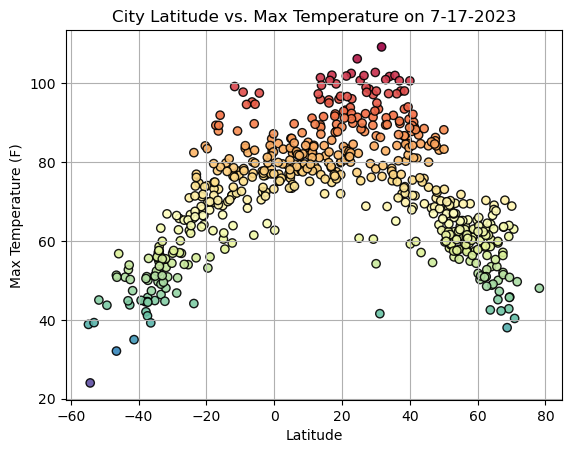

In [17]:
# Build scatter plot for latitude vs. temperature
x = city_weather_df['Lat']
y = city_weather_df['Max Temp']
colors = city_weather_df['Max Temp']

# Incorporate the other graph properties
fig, ax = plt.subplots()
ax.scatter(x, y, c=colors, cmap='Spectral_r', alpha=0.9, edgecolors='black')
ax.set(xlabel='Latitude', ylabel='Max Temperature (F)',
      title=f'City Latitude vs. Max Temperature on {mmddyy}')
ax.grid()

# Save the figure
plt.savefig(f"{output_path}Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

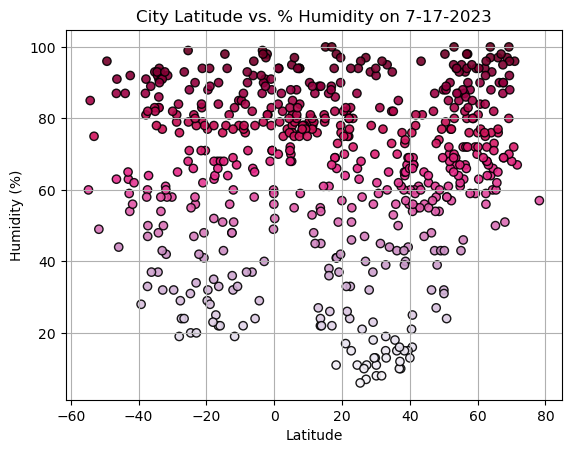

In [18]:
# Build the scatter plots for latitude vs. humidity
x = city_weather_df['Lat']
y = city_weather_df['Humidity']
colors = city_weather_df['Humidity'] 

# Incorporate the other graph properties
fig, ax = plt.subplots()
ax.scatter(x, y, c=colors, cmap='PuRd', alpha=0.9, edgecolors='black')
ax.set(xlabel='Latitude', ylabel='Humidity (%)',
      title=f'City Latitude vs. % Humidity on {mmddyy}')
ax.grid()
# Save the figure
plt.savefig(f"{output_path}Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

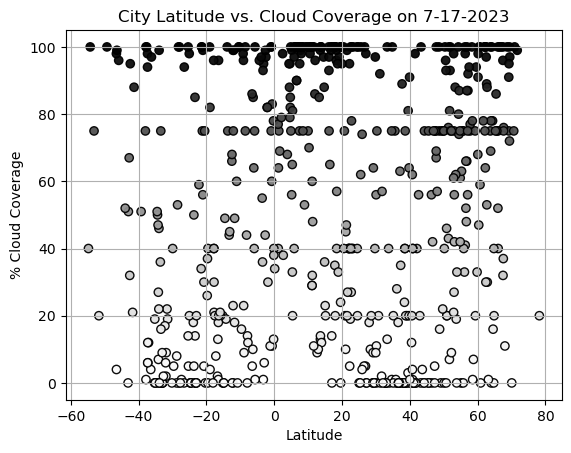

In [19]:
# Build the scatter plots for latitude vs. cloudiness
x = city_weather_df['Lat']
y = city_weather_df['Cloudiness']
colors = city_weather_df['Cloudiness'] 

# Incorporate the other graph properties
fig, ax = plt.subplots()
ax.scatter(x, y, c=colors, cmap='Greys', alpha=.95, edgecolors='black')
ax.set(xlabel='Latitude', ylabel='% Cloud Coverage',
      title=f'City Latitude vs. Cloud Coverage on {mmddyy}')
ax.grid()

# Save the figure
plt.savefig(f"{output_path}Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

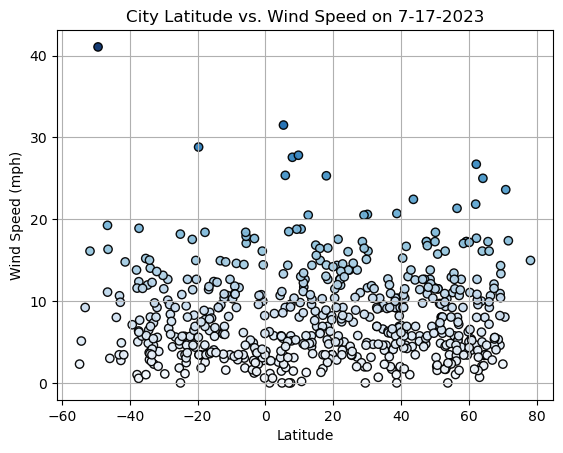

In [20]:
# Build the scatter plots for latitude vs. wind speed -- should be wind speed vs latituxxde
x = city_weather_df['Lat']
y = city_weather_df['Wind Speed']
colors = city_weather_df['Wind Speed']

# Incorporate the other graph properties
fig, ax = plt.subplots()
ax.scatter(x, y, c=colors, cmap='Blues', alpha=.95, edgecolors='black')
ax.set(xlabel='Latitude', ylabel='Wind Speed (mph)',
      title=f'City Latitude vs. Wind Speed on {mmddyy}')
ax.grid()

# Save the figure
plt.savefig(f"{output_path}Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_weather_df[city_weather_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,zouerate,22.7187,-12.4521,102.54,15,27,4.00,MR,1689618513
1,albany,42.6001,-73.9662,86.92,61,56,1.01,US,1689618342
2,pemagatshel,27.0380,91.4031,68.86,97,98,3.18,BT,1689618513
4,newman,37.3138,-121.0208,98.06,10,35,1.68,US,1689618415
5,ribeira grande,38.5167,-28.7000,73.80,64,40,9.22,PT,1689618515


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_weather_df[city_weather_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,blackmans bay,-43.0167,147.3167,52.74,63,51,10.65,AU,1689618364
6,karratha,-20.7377,116.8463,66.49,41,5,4.38,AU,1689618515
7,waitangi,-43.9535,-176.5597,50.83,87,52,8.01,NZ,1689618515
8,puerto natales,-51.7236,-72.4875,45.05,49,20,16.11,CL,1689618515
10,adamstown,-25.0660,-130.1015,70.97,71,98,18.19,PN,1689618516


In [26]:
# Define a function to create Linear Regression plots
# Possible values for y_col_name: temperature, humidity, clouds, wind
# Possible values for hemisphere: n, s

def regression_plot(y_col_name, hemisphere):
    # set up graph
    fig, ax = plt.subplots()
    
    # select dataframe to use based on hemisphere passed to the function
    if hemisphere.lower() == 'n':
        df = northern_hemi_df
        plt.xlim(-5, 85)
    elif hemisphere.lower() == 's':
        df = southern_hemi_df
        plt.xlim(-60, 0)
    else:
        raise ValueError(f"Unknown value input for hemisphere: {hemisphere}. Please choose 'n' or 's'.")
      
    # get the date the data was retrieved
    timestamp = df['Date'].iloc[0]
    dt = time.localtime(timestamp)
    mmddyy = f"{dt[1]}-{dt[2]}-{dt[0]}"
            
    # select y axis, colors, labels, line position, based on parameter chosen
    if y_col_name == 'temperature':
        y_data = df['Max Temp']
        colorscheme = 'Spectral_r'
        ylabel_name = 'Max Temperature (F)'
        plt.ylim = ((df['Max Temp'].min() - 5), (df['Max Temp'].max() + 5))
        
    elif y_col_name == 'humidity':
        y_data = df['Humidity']
        colorscheme = 'PuRd'
        ylabel_name = 'Humidity (%)'
        plt.ylim = (0, 100)
        
    elif y_col_name == 'clouds':
        y_data = df['Cloudiness']
        colorscheme = 'Greys'
        ylabel_name = 'Cloud Coverage (%)'
        plt.ylim = (0, 100)
        
    elif y_col_name == 'wind':
        y_data = df['Wind Speed']
        colorscheme = 'Blues'
        ylabel_name = 'Wind Speed (mph)'
        plt.ylim = (0, (df['Wind Speed'].max() + 5))
        
    else:
        raise ValueError
        (f"Unknown value input for y_col_name: {y_col_name}. Please choose one: 'temperature', 'humidity', 'clouds', or 'wind'.")
    
    # x axis data is always latitude
    x_data = df['Lat']
    xlabel = 'Latitude'
    
    # get ready... and, graph!
    ax.scatter(x_data, y_data, c=y_data, cmap=colorscheme, alpha=.9, edgecolors='black')
    ax.set(xlabel='Latitude', ylabel=ylabel_name, 
           title=f"City Latitude vs. {ylabel_name} on {mmddyy}")
    ax.grid()
    
    # do some statistics stuff, draw regression line, print line equation & r-value
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
    reg_line_plot_yvals = x * slope + intercept
    reg_line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
    
    ax.plot(x,reg_line_plot_yvals,color="lightcoral")
    box_props = dict(boxstyle='round', facecolor='lightcoral', alpha=0.3)
    ax.text(0.05, 0.95, reg_line_eq, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=box_props)    

    print(f"The r-value is: {rvalue}")
    print(f"The regression line equation is: {reg_line_eq}")

    # save the scatter plot
    save_filename = f"{hemisphere}_{y_col_name}_{mmddyy}.png"
    plt.savefig(f"{output_path}{save_filename}")
    
    # draw the scatter plot
    plt.show()

###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6721351821628689
The regression line equation is: y = -0.48x + 92.89


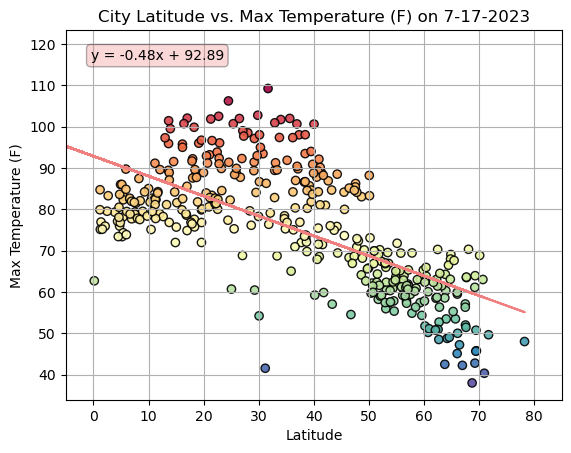

In [24]:
# Linear regression on Northern Hemisphere
regression_plot('temperature','n')

The r-value is: 0.8324213903838902
The regression line equation is: y = 0.9x + 85.28


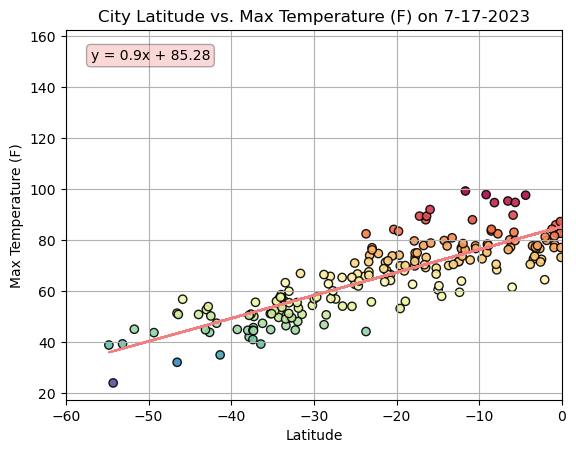

In [27]:
# Linear regression on Southern Hemisphere
regression_plot('temperature','s')

**Discussion about the linear relationship:** As expected, we see a strong relationship between temperature and latitude in both hemispheres: it gets hotter as you get closer to the equator. Since it is winter in the southern hemisphere and summer in the northern hemisphere, the low temperatures are somewhat lower in the south than the north.  It's interesting to see that the relationship is stronger in the southern hemisphere, although there appear to be quite a few more observations in the northern hemisphere. In the northern hemisphere, in the region from 20 to 40 degrees of latitude, there are quite a few points that are further from the line, especially on the hotter side. It would be instructive to look at historical data and see if this is a common occurrence or if it's part of the unusual weather patterns we are seeing recently due to climate change.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.10224075412183453
The regression line equation is: y = 0.12x + 62.25


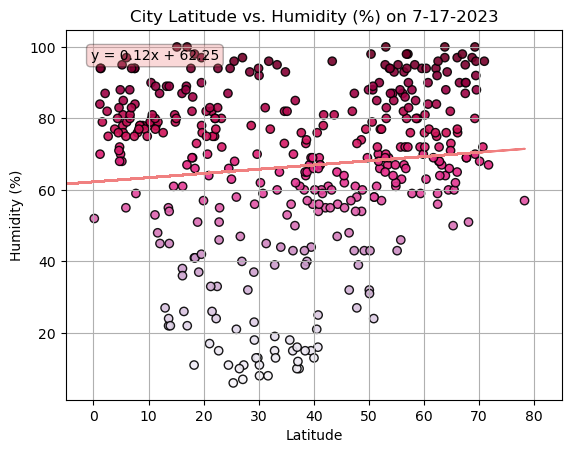

In [34]:
# Northern Hemisphere
regression_plot('humidity','n')

The r-value is: 0.026378500459592665
The regression line equation is: y = 0.04x + 67.58


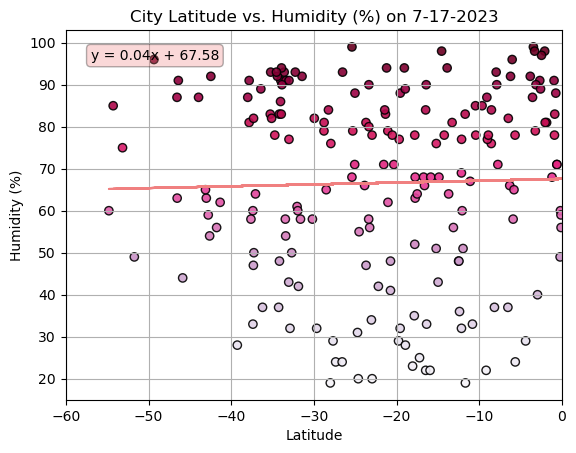

In [35]:
# Southern Hemisphere
regression_plot('humidity','s')

**Discussion about the linear relationship:** There does not appear to be much of a relationship at all between latitude and humidity. The very slight positive slope of the line in the northern hemisphere could possibly be attributed to the fact that it is summer and that in some locations when it is hotter it also tends to be more humid.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.06146562892025178
The regression line equation is: y = -0.11x + 58.95


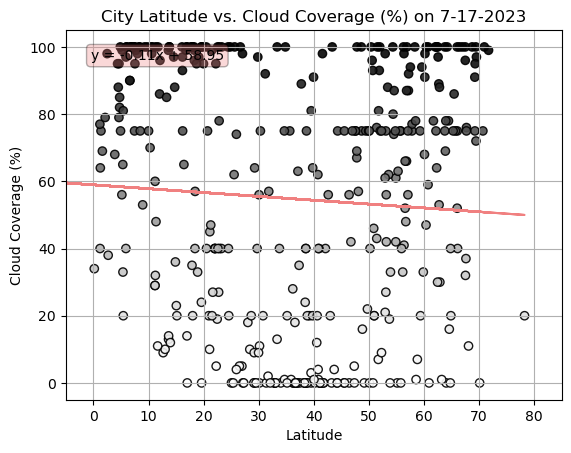

In [30]:
# Northern Hemisphere
regression_plot('clouds', 'n')

The r-value is: 0.10310643120553555
The regression line equation is: y = 0.29x + 48.0


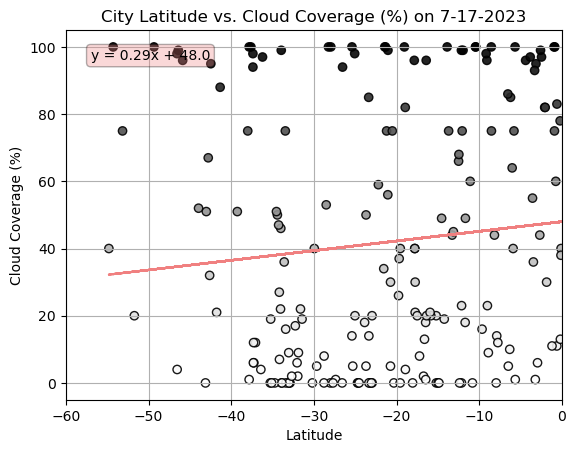

In [31]:
# Southern Hemisphere
regression_plot('clouds', 's')

**Discussion about the linear relationship:** Similarly there is not much of a relationship between latitude and cloud coverage. We do see clusters of points together in the northern hemisphere: lots of clouds in some areas near the equator and the more northerly regions, and then some clear areas in the middle latitudes. This makes sense given how clouds behave.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.01673720919696065
The regression line equation is: y = 0.0x + 8.26


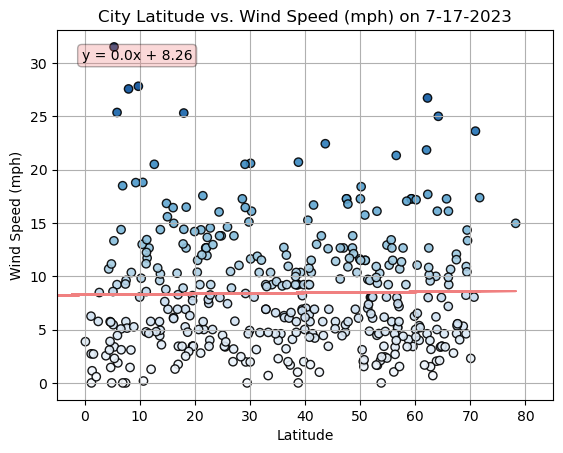

In [32]:
# Northern Hemisphere
regression_plot('wind', 'n')

The r-value is: -0.10802030012553054
The regression line equation is: y = -0.04x + 6.77


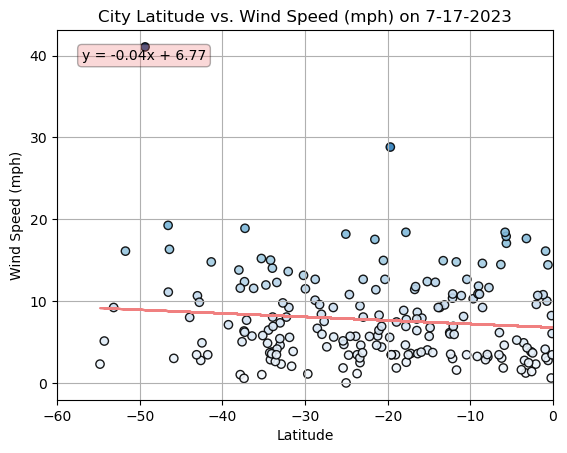

In [33]:
# Southern Hemisphere
regression_plot('wind','s')

**Discussion about the linear relationship:** Again, the correlation between latitude and wind speed is so weak as to be negligible. The only strong correlation we have found with latitude is the temperature.